# Concrete Slump Test Data Analysis

##  Introduction

Concrete is a highly complex material which makes modeling behavior a very difficult task. The workability of concrete can be measured by Concrete Slump Test. This particular dataset report some results about measurement of
Compressive Strength of concrete. We could optimize the use of materials to form the concrete in order to decrease the costs of construction and also meet the requirement of concrete. For given dataset there are 7 input variables and 3 output variables.

**Objective**  
-Descriptive Statistics of Data Set  
-Build tree model for Compressive Strength  
-Furthere Analysis

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
from sklearn.metrics import explained_variance_score
from IPython.display import Image
import pydotplus

### Import Data

In [67]:
file = open('slump_test.data',"r")
data = []
for x in file:
    x=x.replace('\n','') #delete '\n'
    data.append(x)
df = pd.DataFrame(data)
df = df[0].str.split(',', expand=True)
df.columns = df.iloc[0]
df = df.rename(columns = {'Compressive Strength (28-day)(Mpa)': 'CS(Mpa)'})
df = df.iloc[1:, 1:]
df = df.apply(pd.to_numeric)

print(df.shape)
df.head()

(103, 10)


0  Cement   Slag  Fly ash  Water    SP  Coarse Aggr.  Fine Aggr.  SLUMP(cm)  \
1   273.0   82.0    105.0  210.0   9.0         904.0       680.0       23.0   
2   163.0  149.0    191.0  180.0  12.0         843.0       746.0        0.0   
3   162.0  148.0    191.0  179.0  16.0         840.0       743.0        1.0   
4   162.0  148.0    190.0  179.0  19.0         838.0       741.0        3.0   
5   154.0  112.0    144.0  220.0  10.0         923.0       658.0       20.0   

0  FLOW(cm)  CS(Mpa)  
1      62.0    34.99  
2      20.0    41.14  
3      20.0    41.81  
4      21.5    42.08  
5      64.0    26.82

This data set contains 10 attributes and 103 records. There are 7 input variables (Cement, Slag, Fly ash, Water, SP, Coarse Aggr., Fine Aggr.), and 3 output variables (SLUMP, FLOW, Compressive Strength).

## 1. Exploratory Data Analysis

In [56]:
# check if any missing values
df.isna().sum() 
# the result shows there's no missing values

0
Cement          0
Slag            0
Fly ash         0
Water           0
SP              0
Coarse Aggr.    0
Fine Aggr.      0
SLUMP(cm)       0
FLOW(cm)        0
CS (Mpa)        0
dtype: int64

In [97]:
# descriptive analysis
df.describe()

0          Cement        Slag     Fly ash       Water          SP  \
count  103.000000  103.000000  103.000000  103.000000  103.000000   
mean   229.894175   77.973786  149.014563  197.167961    8.539806   
std     78.877230   60.461363   85.418080   20.208158    2.807530   
min    137.000000    0.000000    0.000000  160.000000    4.400000   
25%    152.000000    0.050000  115.500000  180.000000    6.000000   
50%    248.000000  100.000000  164.000000  196.000000    8.000000   
75%    303.900000  125.000000  235.950000  209.500000   10.000000   
max    374.000000  193.000000  260.000000  240.000000   19.000000   

0      Coarse Aggr.  Fine Aggr.   SLUMP(cm)   FLOW(cm)     CS(Mpa)  
count    103.000000  103.000000  103.000000  103.00000  103.000000  
mean     883.978641  739.604854   18.048544   49.61068   36.039417  
std       88.391393   63.342117    8.750844   17.56861    7.838232  
min      708.000000  640.600000    0.000000   20.00000   17.190000  
25%      819.500000  684.500000   14.500000   38.50000   30.900000  
50%      879.000000  742.700000   21.500000   54.00000   35.520000  
75%      952.800000  788.000000   24.000000   63.75000   41.205000  
max     1049.900000  902.000000   29.000000   78.00000   58.530000

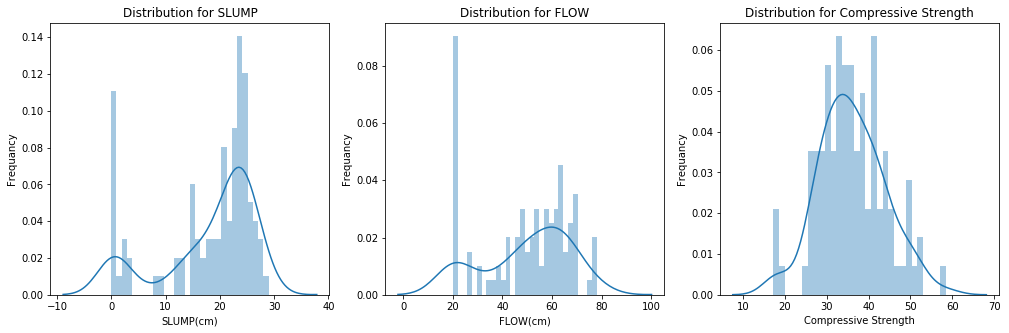

In [75]:
# distribution of output variables
fig = plt.figure(figsize=(17,5))

plt.subplot(1, 3, 1)
sns.distplot(df['SLUMP(cm)'], bins=30, hist_kws={'alpha': 0.4});
plt.title('Distribution for SLUMP')
plt.xlabel('SLUMP(cm)')
plt.ylabel('Frequancy')

plt.subplot(1, 3, 2)
sns.distplot(df['FLOW(cm)'], bins=30, hist_kws={'alpha': 0.4});
plt.title('Distribution for FLOW')
plt.xlabel('FLOW(cm)')
plt.ylabel('Frequancy')

plt.subplot(1, 3, 3)
sns.distplot(df['CS(Mpa)'], bins=30, hist_kws={'alpha': 0.4});
plt.title('Distribution for Compressive Strength')
plt.xlabel('Compressive Strength')
plt.ylabel('Frequancy');

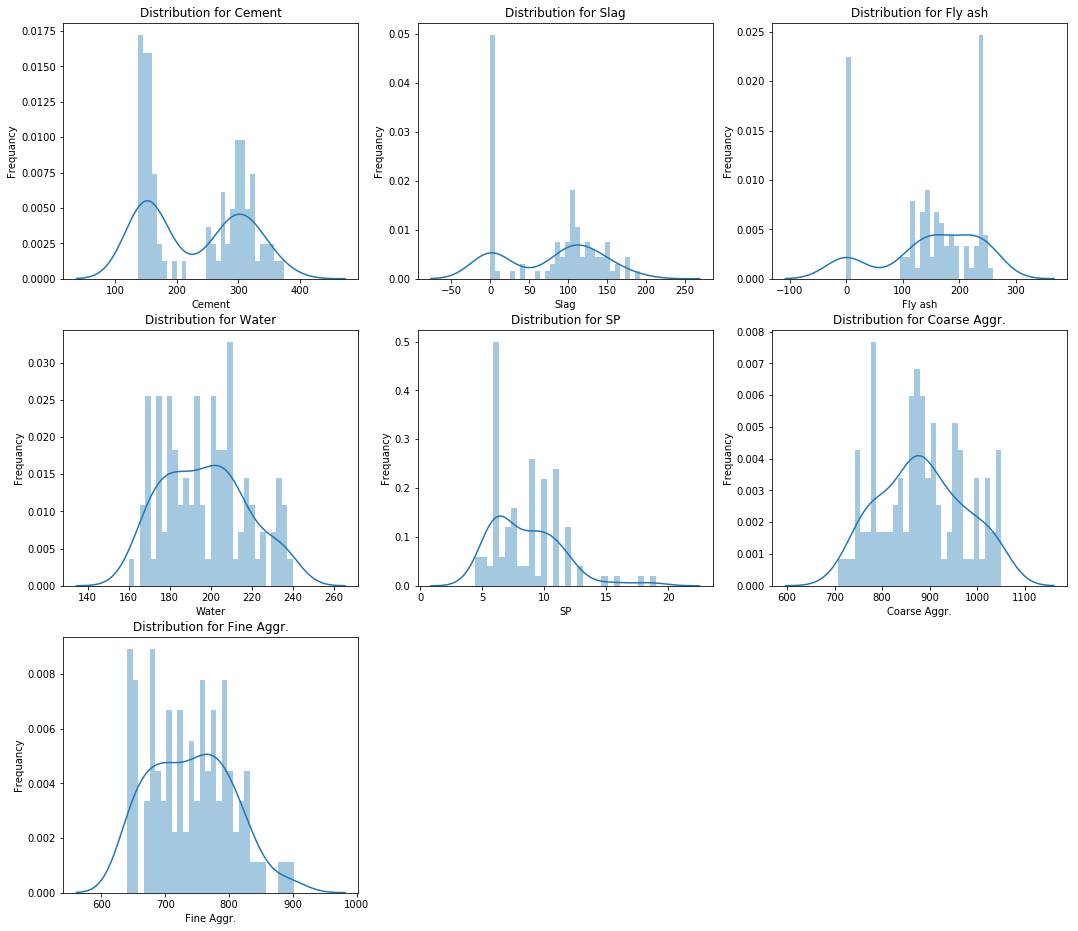

In [96]:
# distribution of input variables
fig = plt.figure(figsize=(18,16))

plt.subplot(3, 3, 1)
sns.distplot(df['Cement'], bins=30, hist_kws={'alpha': 0.4});
plt.title('Distribution for Cement')
plt.xlabel('Cement')
plt.ylabel('Frequancy')

plt.subplot(3, 3, 2)
sns.distplot(df['Slag'], bins=30, hist_kws={'alpha': 0.4});
plt.title('Distribution for Slag')
plt.xlabel('Slag')
plt.ylabel('Frequancy')

plt.subplot(3, 3, 3)
sns.distplot(df['Fly ash'], bins=30, hist_kws={'alpha': 0.4});
plt.title('Distribution for Fly ash')
plt.xlabel('Fly ash')
plt.ylabel('Frequancy');

plt.subplot(3, 3, 4)
sns.distplot(df['Water'], bins=30, hist_kws={'alpha': 0.4});
plt.title('Distribution for Water')
plt.xlabel('Water')
plt.ylabel('Frequancy');

plt.subplot(3, 3, 5)
sns.distplot(df['SP'], bins=30, hist_kws={'alpha': 0.4});
plt.title('Distribution for SP')
plt.xlabel('SP')
plt.ylabel('Frequancy');

plt.subplot(3, 3, 6)
sns.distplot(df['Coarse Aggr.'], bins=30, hist_kws={'alpha': 0.4});
plt.title('Distribution for Coarse Aggr.')
plt.xlabel('Coarse Aggr.')
plt.ylabel('Frequancy');

plt.subplot(3, 3, 7)
sns.distplot(df['Fine Aggr.'], bins=30, hist_kws={'alpha': 0.4});
plt.title('Distribution for Fine Aggr.')
plt.xlabel('Fine Aggr.')
plt.ylabel('Frequancy');

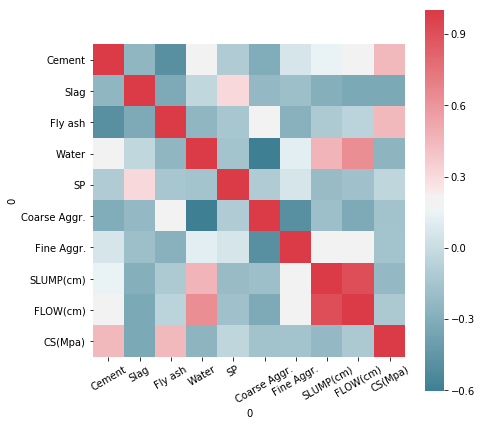

In [99]:
# correlation plot
corrmat = df.corr()
#print(corrmat) # we can get correlation coefficients here
f, ax = plt.subplots(figsize=(7, 7))
cmap = sns.diverging_palette(220, 10, as_cmap=True);
g=sns.heatmap(corrmat, square=True, cmap=cmap);
g.set_xticklabels(g.get_xticklabels(),rotation=30);

**- In plain English, explain your exploratory analysis process and what you observed about the data.**

For emploratory data analysis, first I did some preparation work such as understanding each variable's meaning, data type and checked if there's missing value. If we have missing values in this kind of small data set, we'd better to do data imputation to replace missing values. But luckly, in this case, the data is complete and clean.

Then I did descriptive analysis, which helped us summarize features of our data (e.g. mean, minimum, maximum, standard deviation). These features can tell us the central tendency and spread of each variable.

I also drew distribution plots for both imput variables and output variables. Theses distributions could tell us more details about what our data looks like. The last plot is a heatmap, which is a very straight forward way to express correlations between each pair of variables. The redder the grid is, the more the corresponding variables are positive correlated. The darker the grid is, the more the variables are nagatively correlated.

**- In plain English, explain the visual representations you generated and what they reveal about the data structure.**
**- In plain English, explain how findings from the exploratory analysis might influence additional analyses.**

We typically expect the data to appear in the familiar, bell-shaped curve of the normal distribution. So, by looking at distributions of all variables, we can figure out if there are outliers, highly skewed or multiple modes. Solving these problems can help us improve model performance and increase prediction accuracy. There is not a lot of outliers and tree-based model is not sensitive to outliers. There are some varibles like SP and Fine Agg. are highly skewed. But since we're gonna build tree model rather than regression model, we don't need data transformation because there's no distribution assumptions for data.

From distribution plots for output variables, we can see that Compressive Strength distribution is similar to normal distribution while distributions of SLUMP and FLOW are consisted of two parts -- they all reach a peak at a certain value (for SLUMP is 0 and for FLOW is 20) and rest of the part is similar to normal distribution.

From distribution plots of input variables, we see some variables have the same situation as SLUMP and FLOW, such as Cement, Slag and Fly ash. They all seem to have two or more distinct peaks or "humps". This type of of histogram shape often reflects the presence of different processes. The best solution for mixed data is to separate the data based on the individual processes, and then make separate histograms. Take Slag for example, we see a lot of zero values. Then, we could separate the variable into two parts -- zero value and other values. This could help us in two ways. First is to use distribution to predict Slag if we have missing value. Second, it provides us another feature engineering option-- transfer numeric variale into categorical variable.

From heat map, we can see some of variables probably correlated like (inside the brackets is correlation coefficient):
FLOW and SLUMP (0.906)
FLOW and Water (0.632)
Water and Coarse Agg. (-0.602)
If we want to build linear regression, we need to do feature engineering to decrease the correlation since independent varaibles are not allowed to be correlated with each other in linear regression. But since we are going to build tree model, we don't need to do that because tree models are by nature immune to collinearity problem.

## 2. Correlation Between CS and Other Features

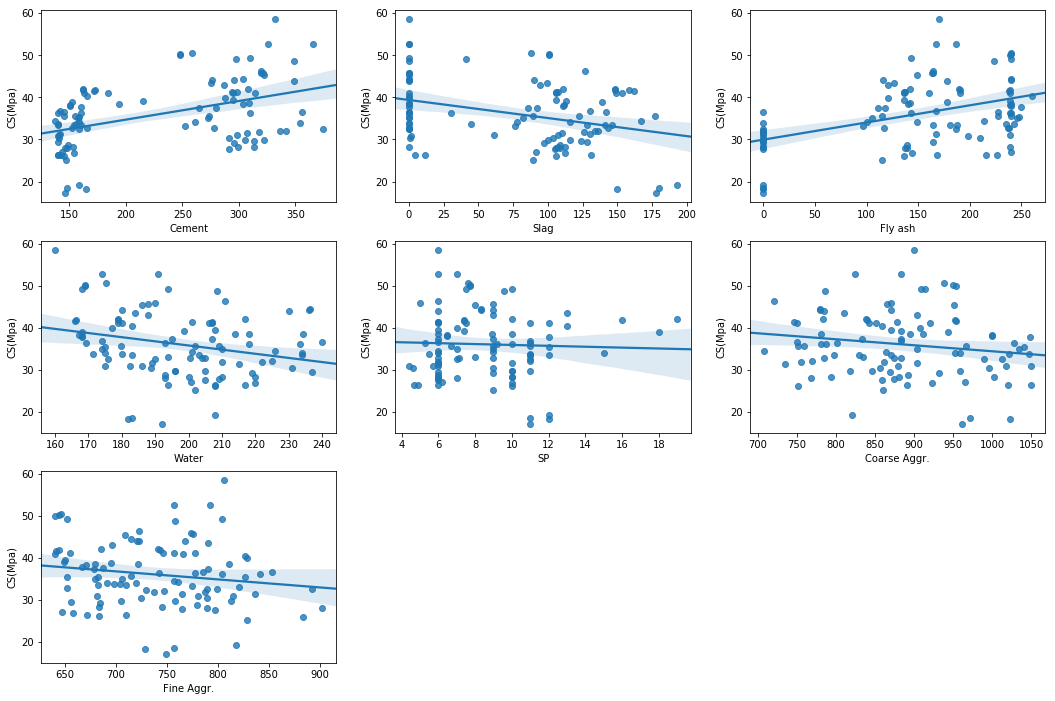

In [121]:
df['bin_CS'] = pd.cut(df['CS(Mpa)'], bins=10, labels=False).values

columns = df.columns[:7]
fig, ax = plt.subplots(figsize = (18, 12))

for i in range(7):
    plt.subplot(3, 3, i+1)
    sns.regplot(x=columns[i], y='CS(Mpa)', data = df);

In [124]:
df[columns].apply(lambda x: x.corr(df['CS(Mpa)']))

0
Cement          0.445725
Slag           -0.331588
Fly ash         0.444393
Water          -0.254235
SP             -0.037871
Coarse Aggr.   -0.160684
Fine Aggr.     -0.154484
dtype: float64

In [128]:
# Correlation after deleting data with Fly ash equals zero
df1=df[df['Fly ash']!=0]
df1['Fly ash'].corr(df1['CS(Mpa)'])

0.06726703755517757

C:\Users\Wanti\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0.5548324281718691


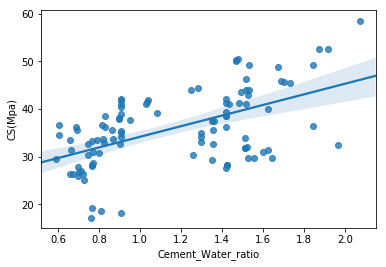

In [203]:
df2=df[['Cement','Water','Fly ash','CS(Mpa)']]
df2['Cement_Water_ratio']=df2['Cement']/df2['Water']
print(df2['Cement_Water_ratio'].corr(df2['CS(Mpa)']))
sns.regplot(x='Cement_Water_ratio', y='CS(Mpa)', data = df2);

I ploted regplots between Compressive Strength and all independent variables. Most of the plots show a little trend.

**- Select one of the correlations you demonstrate and explain, in plain English, what the correlation says of the sample data.**

I want to select correlation between Compressive Strength and Fly ash. Through the plot we can see there's an obvious trend between them and the correlation coefficient I calculated is 0.444. That mean the value of Compressive Strength is slightly positive correlated with value of Fly ash but that doesn't mean causal relationship. But when we take close look at it, we see for Fly ash there are a bunch of zero values and they are a little bit far away from other points. That may influence the angle of regression line and cause inaccurate correlation coefficient calculation. So, I removed thoes zero values and calculated the correlation coefficient again. I got 0.067 this time, which means apart from thoes zero values in Fly ash, there actuallly isn't much correlation between Fly ash and Compressive Strength. That is to say whether Fly ash is zero or not is correlated with value of Compressive Strength but for Fly ash that is not zero, the value is not correlated with Compressive Strength.

**- Which inputs are most predictive of CS? How did you know which inputs are most predictive of CS?**
 
Cement, Fly ash and Slag are most predictive of CS because they get top 3 highest correlation coefficients. However, I read some papers about compressive strength and noticed that Cement/Water ratio may also play an important role in Compressive Strength. Therefore, I ploted correlation between CS and Cement/Water ratio. Both the plot and the correlation coefficient (0.555) show a positive relationship between them.  

Cement/Water ratio, Fly ash and Slag are most predictive of CS. For other variables, I don't see very clear pattern in the scatter plot, even nonlinear pattern.

## 3. Single Decision Tree Model

In [279]:
#split training and test set
X_train, X_test, y_train, y_test = train_test_split(df2[['Fly ash', 'Cement_Water_ratio']], df['CS(Mpa)'], test_size = 0.15, random_state = 123)
print('Training Data Shape:', X_train.shape)
print('Test Data Shape:', X_test.shape)

Training Data Shape: (87, 2)
Test Data Shape: (16, 2)


In [289]:
## tuning parameters
params_to_test = {
    'max_depth':[3,4,5,6,7,8],
    'min_samples_split': [2,3,4,5,6],
    'min_samples_leaf': [1,2,3,5,7]
}

#here you can put any parameter you want at every run, like random_state or verbosity
dt_model = DecisionTreeRegressor(random_state=10)
#here you specify the CV parameters, number of folds, numberof cores to use...
grid_search = GridSearchCV(dt_model, param_grid=params_to_test, cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_ 
print('Best Parameters: ',best_params)

Best Parameters:  {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 4}


In [290]:
grid_search.grid_scores_

C:\Users\Wanti\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.68753, std: 0.10700, params: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2},
 mean: 0.68824, std: 0.10636, params: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3},
 mean: 0.68824, std: 0.10636, params: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 4},
 mean: 0.68824, std: 0.10636, params: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5},
 mean: 0.68061, std: 0.09977, params: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 6},
 mean: 0.67986, std: 0.11836, params: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2},
 mean: 0.67986, std: 0.11836, params: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 3},
 mean: 0.67986, std: 0.11836, params: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 4},
 mean: 0.67986, std: 0.11836, params: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5},
 mean: 0.67223, std: 0.11193, params: {'max_depth': 3, 'min_samples_leaf'

In [291]:
best_model = DecisionTreeRegressor(**best_params)
sdt = best_model.fit(X_train, y_train)

# Performance on train
train_y_pred = sdt.predict(X_train)
rmse_train=round(np.sqrt((train_y_pred - y_train)**2).mean(), 2)
evs_train=round(explained_variance_score(y_train, train_y_pred), 2)
print("RMSE on train : ", rmse_train)
print("Explained variance score on train: ", evs_train)

# Performance on test
test_y_pred = sdt.predict(X_test)
rmse_test=round(np.sqrt((test_y_pred - y_test)**2).mean(), 2)
evs_test=round(explained_variance_score(y_test, test_y_pred), 2)
print("RMSE on test : ", rmse_test)
print("Explained variance score on test: ", evs_test)

RMSE on train :  0.85
Explained variance score on train:  0.97
RMSE on test :  1.69
Explained variance score on test:  0.86


In [292]:
export_graphviz(sdt, out_file='tree.dot', 
                feature_names = X_train.columns,
                class_names = 'CS(Mpa)',
                rounded = True, proportion = False, 
                precision = 2, filled = True)

!dot -Tpng tree.dot -o tree.png -Gdpi=600

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

**-In plain English, explain the visual representation you generated.**

The tree plot shows the process to get prediction. The height of the tree is 7 and each node shows the split criterion. If the data meet the criterion, then go to left, otherwise go to right. When it reaches the leaf, we get the prediction.

**-In plain English, explain what the test error signifies.**

Root mean square error is the standard deviation of the residuals. Residuals are a measure of how far from the predictive values are; RMSE is a measure of how spread out these residuals are. The test set root mean square error is 1.69 and the training set root mean square error is 0.86. The test error 1.69 here signifies average magnitude of the error. It's the square root of the average of squared differences between prediction and actual observation.

**-What is the ideal depth of your tree model? How did you determine the ideal tree depth?**

The ideal depth of my tree model is 7. I determinted it through cross validation using gridsearch function in python. What it did is to try many depth values (in this case 5,6,7,8,9) and calculate cross validation error for each value, then it picked the depth value with lowest error for me.

**-What is the accuracy score of your model? In plain English, explain what the accuracy score signifies.**

Here I used explained variance score to meacure accuracy of my model. It represents how much the fluctuation of CS can be explained by the decision tree. The higher the score is, the more accurate the model is. Here we got 0.86 for this model, which means the model performs very good.


## 4. Random Forest

In [235]:
df['Cement_Water_ratio']=df2['Cement_Water_ratio']
#split training and test set
X_train, X_test, y_train, y_test = train_test_split(df[['Slag','SP','Coarse Aggr.','Fine Aggr.','Fly ash','Cement_Water_ratio','Cement','Water']], df['CS(Mpa)'], test_size = 0.15, random_state = 123)
print('Training Data Shape:', X_train.shape)
print('Test Data Shape:', X_test.shape)

Training Data Shape: (87, 8)
Test Data Shape: (16, 8)


In [261]:
params_to_test = {
    'n_estimators': [1400,1500,1600,1700,1800],
   'max_features': [0.2,0.3,0.4],
   'max_depth': [10,16,20,25,30],
   'min_samples_split': [2,3,4,5,6,7],
   'min_samples_leaf': [1,2,3,4]
}


rf = RandomForestRegressor()
rf_model= RandomizedSearchCV(estimator = rf, param_distributions = params_to_test, n_iter = 100, cv = 3, verbose=2, random_state=123, n_jobs = -1)
rf_model.fit(X_train, y_train)

best_params = rf_model.best_params_ 
print('Best Parameters: ',best_params)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.2min finished


Best Parameters:  {'n_estimators': 1700, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.3, 'max_depth': 16}


In [262]:
best_model = RandomForestRegressor(**best_params)
rf = best_model.fit(X_train, y_train)

# Performance on train
train_y_pred = rf.predict(X_train)
rmse_train=round(np.sqrt((train_y_pred - y_train)**2).mean(), 2)
evs_train=round(explained_variance_score(y_train, train_y_pred), 2)
print("RMSE on train : ", rmse_train)
print("Explained variance score on train: ", evs_train)

# Performance on test
test_y_pred = rf.predict(X_test)
rmse_test=round(np.sqrt((test_y_pred - y_test)**2).mean(), 2)
evs_test=round(explained_variance_score(y_test, test_y_pred), 2)
print("RMSE on test : ", rmse_test)
print("Explained variance score on test: ", evs_test)

RMSE on train :  0.94
Explained variance score on train:  0.98
RMSE on test :  1.62
Explained variance score on test:  0.9


**-How many trees does your model include? How did you determine the number of trees to include?**

I chose 1700 trees for my model. I determine the number based on grid search using cross validation. It shows 1700 trees is the best number among others.

**-How many features does your model account for? How did you determine how many features to account for?**

I used cross validation to help me choose the maximum number of features in random forest model. The best value it picks for me is 0.3, which means 30% of features (2-3 features) to be considered in the model.

We can see from the result that radom forest model is better than single decision tree model. The RMSE on test data is smaller than that in decision tree and explained variance score on test data is 0.9, which is also higher than that in decision tree model.

## 5. Improvement and Additional Analysis

**-What alternative methods might you use to predict CS?**

Since the data is very small, I'll try Neural networks but I don't expect very good result from it because it needs large number of data to tune parameters. I may try more parametric models such as Support Vector Machine with different kernels, regression model or Bayesian model. I would also try other tree based models such as Adaboost and Extreme Gradient Boosting because it has very good control on overfitting problem.

**-What additional data, not included in the dataset, might help better predict CS?**

Concrete Strength can be also affected many other factors, such as water temperatures, rheological properties, shear stresses during preparation, gas content and Cement-related parameters (alite content, alite and belite reactivity, cement sulfate content). These information can also help better predict CS.

**-Based on the EDA you completed in the first step, what additional analyses might you complete based on the data structure?**

From distribution plots of thoes variables, I noticed some distributions have multiple "humps". I will spend more time figure out the cause of it and whether distribution of CS acts differently in different situation. Another thing is for the correlation between CS and all other variables, I only checked linear correlation. I could check other nonlinear relationship such as quadratic relationship. Then I can do some data transformation based on this before modeling.

Also, here I only tried Cement/Water ratio, which makes value of water becomes important to CS. I'll try other ratios or other calculations if I have more time.

**-What applications might your analysis lead to? In plain English, describe what business value these models could provide to a prospective client.**

This project is about a test case in material science. People need to do the test many times, therefore finding better models to improve the test can help not only save lots of material but also get good products. From EDA and our models, we noticed that cement/wanter ratio and Fly ash are two important factors for compressive strength.